<a href="https://colab.research.google.com/github/ClaudiaGtzD/AprendizajeAutomatico/blob/master/Tarea_05_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Importaciones
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from numpy import ones, vstack
from numpy.linalg import lstsq

In [21]:
datosGeneracion = pd.read_excel("../Datasets/Información Planta Solar Estacionaria.xlsx")
datosGeneracion

,Fecha,Anio,Mes,NumMes,Dia,NumDia,Hora,NumHora,Generacion,Temperatura,...,Generacion_diff,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,IndiceUV_diff,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
0,1.625184e+09,2021,199,7,6027,2,144624,0,0.0000,18.0,...,0.0000,-1.0,4,1.0,-2.0,0.0,0,-2.0,0.0,0.0
1,1.625188e+09,2021,199,7,6027,2,144625,1,0.0000,18.0,...,0.0000,0.0,8,0.0,0.0,0.0,0,-2.0,0.0,0.0
2,1.625191e+09,2021,199,7,6027,2,144626,2,0.0000,18.0,...,0.0000,0.0,5,2.0,-2.0,0.0,0,-2.0,0.0,0.0
3,1.625195e+09,2021,199,7,6027,2,144627,3,0.0000,17.0,...,0.0000,-1.0,0,1.0,0.0,0.0,0,-2.0,0.0,-1.0
4,1.625198e+09,2021,199,7,6027,2,144628,4,0.0000,17.0,...,0.0000,0.0,0,7.0,0.0,0.0,0,-2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18917,1.693508e+09,2023,224,8,6817,31,163603,19,1732.7788,25.2,...,1165.2214,0.6,0,-11.0,-2.5,16.0,0,-5.4,0.0,-3.4
18918,1.693512e+09,2023,224,8,6817,31,163604,20,0.0000,21.5,...,0.0000,2.5,0,-20.0,-1.4,43.0,0,-3.6,-1.4,-2.7
18919,1.693516e+09,2023,224,8,6817,31,163605,21,0.0000,20.8,...,0.0000,2.4,0,-20.0,0.3,33.0,0,-2.8,-1.3,-2.6
18920,1.693519e+09,2023,224,8,6817,31,163606,22,0.0000,18.2,...,0.0000,0.2,0,-28.0,5.8,-9.0,0,5.0,0.0,-6.3


In [51]:
datosGeneracion["DesCondCielo"].unique()

array(['Cielo nublado', 'Poco nuboso', 'Cielo cubierto', 'Despejado',
       'Medio nublado'], dtype=object)

In [22]:
x = datosGeneracion[['Temperatura_diff', 'ProbabilidadLluvia_diff', 'DireccionViento_diff',
                     'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'DPT_diff']]

In [23]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled, columns = x.columns)
x_scaled

,Temperatura_diff,ProbabilidadLluvia_diff,DireccionViento_diff,IndiceUV_diff,CodCondCielo,CodDirViento,VelocidadRafaga_diff,DPT_diff
0,0.447368,0.527950,0.494949,0.444444,0.75,0.375,0.494208,0.507246
1,0.473684,0.552795,0.494949,0.444444,0.75,0.375,0.494208,0.507246
2,0.473684,0.534161,0.494949,0.444444,0.25,0.375,0.494208,0.507246
3,0.447368,0.503106,0.494949,0.444444,0.25,0.375,0.494208,0.492754
4,0.473684,0.503106,0.494949,0.444444,0.25,0.375,0.494208,0.521739
...,...,...,...,...,...,...,...,...
18917,0.489474,0.503106,0.518038,0.444444,0.50,0.250,0.461390,0.457971
18918,0.539474,0.503106,0.556999,0.444444,0.50,0.250,0.478764,0.468116
18919,0.536842,0.503106,0.542569,0.444444,0.50,0.375,0.486486,0.469565
18920,0.478947,0.503106,0.481962,0.444444,0.50,0.375,0.561776,0.415942


In [24]:
kmeans = KMeans(n_clusters = 9, n_init = 'auto').fit(x_scaled)

In [25]:
datosGeneracion["cluster"] = kmeans.labels_
datosGeneracion

,Fecha,Anio,Mes,NumMes,Dia,NumDia,Hora,NumHora,Generacion,Temperatura,...,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,IndiceUV_diff,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff,cluster
0,1.625184e+09,2021,199,7,6027,2,144624,0,0.0000,18.0,...,-1.0,4,1.0,-2.0,0.0,0,-2.0,0.0,0.0,5
1,1.625188e+09,2021,199,7,6027,2,144625,1,0.0000,18.0,...,0.0,8,0.0,0.0,0.0,0,-2.0,0.0,0.0,5
2,1.625191e+09,2021,199,7,6027,2,144626,2,0.0000,18.0,...,0.0,5,2.0,-2.0,0.0,0,-2.0,0.0,0.0,1
3,1.625195e+09,2021,199,7,6027,2,144627,3,0.0000,17.0,...,-1.0,0,1.0,0.0,0.0,0,-2.0,0.0,-1.0,1
4,1.625198e+09,2021,199,7,6027,2,144628,4,0.0000,17.0,...,0.0,0,7.0,0.0,0.0,0,-2.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18917,1.693508e+09,2023,224,8,6817,31,163603,19,1732.7788,25.2,...,0.6,0,-11.0,-2.5,16.0,0,-5.4,0.0,-3.4,0
18918,1.693512e+09,2023,224,8,6817,31,163604,20,0.0000,21.5,...,2.5,0,-20.0,-1.4,43.0,0,-3.6,-1.4,-2.7,0
18919,1.693516e+09,2023,224,8,6817,31,163605,21,0.0000,20.8,...,2.4,0,-20.0,0.3,33.0,0,-2.8,-1.3,-2.6,0
18920,1.693519e+09,2023,224,8,6817,31,163606,22,0.0000,18.2,...,0.2,0,-28.0,5.8,-9.0,0,5.0,0.0,-6.3,0


In [26]:
kmeans.cluster_centers_

array([[0.46287798, 0.49912892, 0.48287638, 0.44403041, 0.49988708,
        0.30312782, 0.51393358, 0.51653107],
       [0.47247052, 0.4902554 , 0.48546764, 0.45010134, 0.03648244,
        0.37853934, 0.50383945, 0.50904899],
       [0.49217018, 0.49123594, 0.54387551, 0.44752814, 0.02290749,
        0.83292952, 0.50560951, 0.49592671],
       [0.4895592 , 0.5102434 , 0.55784262, 0.44469063, 0.59490399,
        0.75738552, 0.50835363, 0.49116948],
       [0.45283275, 0.78779323, 0.4882294 , 0.42412764, 0.79958678,
        0.33445248, 0.53740547, 0.52288897],
       [0.45769605, 0.48333508, 0.4915932 , 0.42962762, 0.75      ,
        0.32536665, 0.51537586, 0.51194215],
       [0.47523799, 0.49331085, 0.46814535, 0.44810481, 0.0194607 ,
        0.19301704, 0.50288421, 0.51245831],
       [0.50716352, 0.49907544, 0.55386361, 0.44642352, 0.00852417,
        0.62964377, 0.54864374, 0.47373382],
       [0.45816524, 0.52024939, 0.48589411, 0.4391568 , 1.        ,
        0.31773477, 0.516431

In [27]:
inercias = []
silhouettes = []
davies_bouldin = []
for k in range(2, 10):
  kmeans = KMeans(n_clusters = k).fit(x_scaled.values)
  inercias.append(kmeans.inertia_)
  silhouettes.append(silhouette_score(x_scaled, kmeans.labels_))
  davies_bouldin.append(davies_bouldin_score(x_scaled, kmeans.labels_))

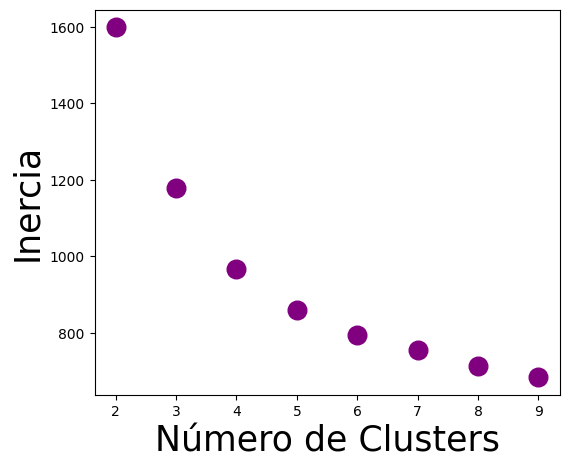

In [28]:
plt.figure(figsize=(6, 5), dpi = 100)
plt.scatter(range(2, 10), inercias, marker = "o", s = 180, color = "purple")
plt.xlabel("Número de Clusters", fontsize = 25)
plt.ylabel("Inercia", fontsize = 25)
plt.show()

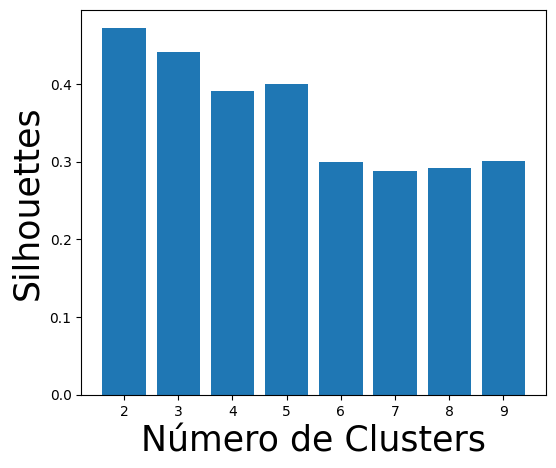

In [29]:
plt.figure(figsize=(6, 5), dpi = 100)
plt.bar(range(2, 10), silhouettes)
plt.xlabel("Número de Clusters", fontsize = 25)
plt.ylabel("Silhouettes", fontsize = 25)
plt.show()

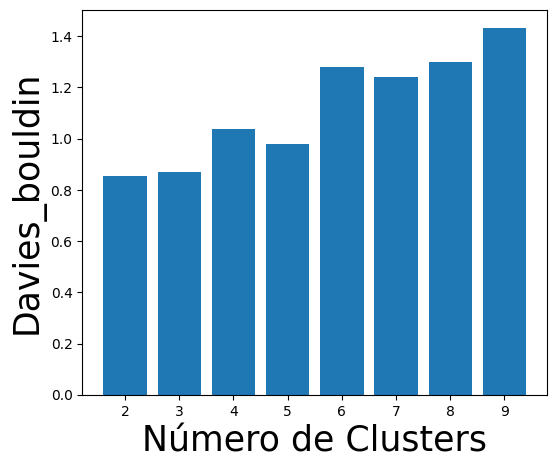

In [30]:
plt.figure(figsize=(6, 5), dpi = 100)
plt.bar(range(2, 10), davies_bouldin)
plt.xlabel("Número de Clusters", fontsize = 25)
plt.ylabel("Davies_bouldin", fontsize = 25)
plt.show()

In [31]:
df_inertias = pd.DataFrame({'n_clusters': range(2, 10), 'inertia': inercias})
df_inertias

,n_clusters,inertia
0,2,1599.126291
1,3,1178.265698
2,4,966.261151
3,5,860.250754
4,6,795.913438
5,7,755.772538
6,8,712.853681
7,9,684.379096


In [32]:
points = [(df_inertias.iloc[0, :].n_clusters, df_inertias.iloc[0, :].inertia),
          (df_inertias.iloc[-1, :].n_clusters, df_inertias.iloc[-1, :].inertia)
]
x_coords, y_coords = zip(*points)
A = vstack([x_coords, ones(len(x_coords))]).T
m, b = lstsq(A, y_coords, rcond = None)[0]

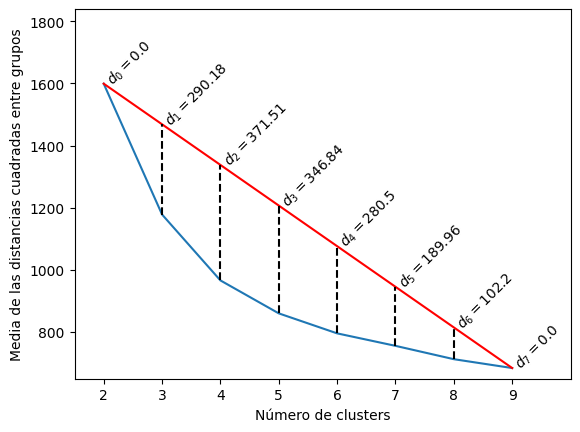

<Figure size 640x480 with 0 Axes>

In [54]:
plt.figure()
plt.plot(df_inertias.n_clusters, df_inertias.inertia)
plt.plot(df_inertias.iloc[[0, -1], :].n_clusters, df_inertias.iloc[[0, -1], :].inertia, c = 'r')
for i, r in df_inertias.iterrows():
  d = '$d_{' + str(i) + '}' + f' = {abs(round(r.inertia - (m * r.n_clusters + b), 2)):,}$'
  plt.annotate(d, xytext = (r.n_clusters, m * r.n_clusters + b), xy = (r.n_clusters, m * r.n_clusters + b), rotation = 45)
  plt.plot([r.n_clusters, r.n_clusters], [r.inertia, m * r.n_clusters + b], '--k')
plt.xlabel('Número de clusters')
plt.ylabel('Media de las distancias cuadradas entre grupos')
plt.xlim((1.5, 10))
plt.ylim((650, 1.15 * df_inertias.inertia.max()))
plt.xticks(range(2, 10))
plt.show()
plt.savefig("Elbow Method.png")

In [34]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(x_scaled)
distancias, indices = nbrs.kneighbors(x_scaled)

In [35]:
print(distancias)

[[0.         0.         0.01930502 ... 0.02876282 0.02876282 0.02876282]
 [0.         0.01147823 0.01908808 ... 0.02714846 0.0310559  0.0310559 ]
 [0.         0.00621118 0.02027961 ... 0.03427111 0.03427111 0.03560449]
 ...
 [0.         0.02328215 0.04344491 ... 0.05219893 0.05345566 0.05350636]
 [0.         0.04150888 0.04248978 ... 0.05763884 0.05778919 0.05797254]
 [0.         0.04950615 0.04951061 ... 0.06222952 0.07092386 0.07099919]]


In [36]:
print(indices)

[[    0   262  5017 ...  3485   290  3483]
 [    1  8170  8172 ...  8174  2689   190]
 [    2    32    33 ...  2699  3758  8416]
 ...
 [18919 17471 12163 ... 16335 12067  8523]
 [18920  6906  7058 ...  6352  4081  7957]
 [18921 11778 14847 ... 10952 11779 18297]]


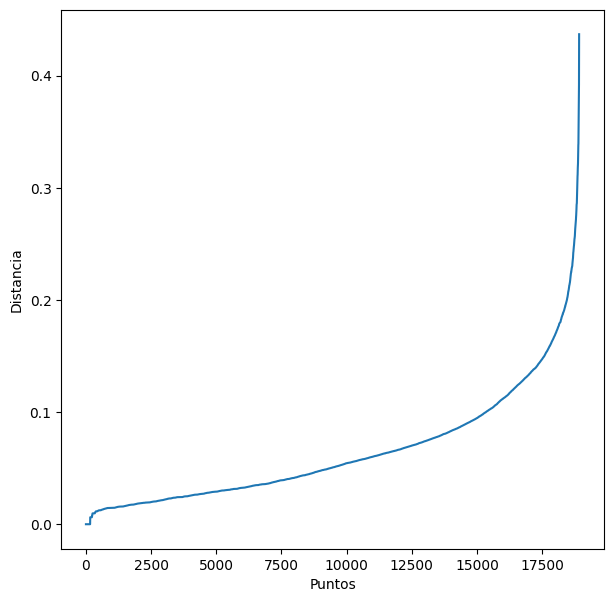

In [37]:
distancias = np.sort(distancias, axis = 0) #Ordena las distancias
distancias = distancias[:,9] #me quedo con la última columna, la que tiene la mayor distancia

fig = plt.figure(figsize = (7, 7))
plt.plot(distancias)
plt.xlabel("Puntos")
plt.ylabel("Distancia")
plt.show()

In [39]:
dbscan = DBSCAN(eps = 0.21, min_samples = 10)
x_dbscan = dbscan.fit(x_scaled)

In [40]:
kmeans = KMeans(n_clusters = 2, n_init = 'auto').fit(x_scaled)

In [41]:
x_scaled["dbscan"] = x_dbscan.labels_
x_scaled["kmeans"] = kmeans.labels_

In [42]:
x_scaled.groupby(["dbscan"])["dbscan"].count()

dbscan
-1     124
 0    2259
 1     993
 2     959
 3    9664
 4    4923
Name: dbscan, dtype: int64

In [43]:
x_scaled.groupby(["kmeans"])["kmeans"].count()

kmeans
0     8216
1    10706
Name: kmeans, dtype: int64

In [44]:
dbscan_s = silhouette_score(x_scaled.drop(columns=["kmeans", "dbscan"]), x_dbscan.labels_)
dbscan_db = davies_bouldin_score(x_scaled.drop(columns=["kmeans", "dbscan"]), x_dbscan.labels_)

kmeans_s = silhouette_score(x_scaled.drop(columns=["kmeans", "dbscan"]), kmeans.labels_)
kmeans_db = davies_bouldin_score(x_scaled.drop(columns=["kmeans", "dbscan"]), kmeans.labels_)

In [45]:
dbscan_s

0.23160206008016362

In [46]:
dbscan_db

4.75283420421491

In [47]:
kmeans_s

0.47209819725155205

In [48]:
kmeans_db

0.854079078446489